### This notebook tests the evaluation of the trained model

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys


In [12]:
# load the test data
df = pd.read_csv('../data/permit-time-testing.csv')

In [13]:
df.head(5)

,number_of_units,longitude,latitude,construction,demolition,renovation,residential,commercial,other,industrial,governmental,habitation,approval_time
0,0.0,-73.861703,45.496176,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,-73.868248,45.518652,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,8.0,-73.658603,45.571047,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0
3,1.0,-73.875712,45.516527,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,43.0
4,0.0,-73.860113,45.506503,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0


In [32]:
# exploring the approval time column
df['approval_time'].describe()

count     732.000000
mean       44.036885
std       117.327922
min         0.000000
25%         2.000000
50%        15.000000
75%        41.000000
max      2240.000000
Name: approval_time, dtype: float64

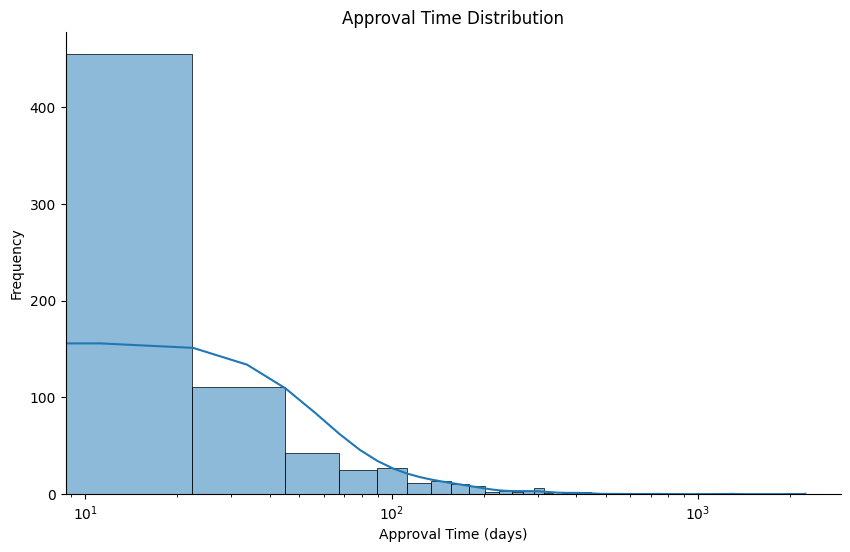

In [33]:
# plot the approval time in log scale
plt.figure(figsize=(10, 6))
sns.histplot(df['approval_time'], bins=100, kde=True)
sns.despine()
plt.xscale('log')
plt.xlabel('Approval Time (days)')
plt.ylabel('Frequency')
plt.title('Approval Time Distribution')
plt.show()


In [15]:
# load trained model
import pickle

with open('../saved_model/trained_model.pkl', 'rb') as f:
    global model
    model = pickle.load(f)

In [19]:
# get input features and target
X, y = df.iloc[:, :-1], df.iloc[:, -1]

# print shape of input features and target
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (732, 12)
y shape: (732,)


In [ ]:
# make predictions
predictions = model.predict(X)

# print the predictions
print(f"Predictions: {predictions}")

In [22]:
# convert predictions from log-scale to original scale
predictions = np.exp(predictions)

In [24]:
print(f"Predictions in original scale: {predictions}")

Predictions in original scale: [8.06675576 8.06675576 4.98285263 7.95660721 8.06675576 8.06675576
 8.06675576 8.06675576 7.95660721 8.06675576 8.06675576 8.06675576
 8.06675576 5.28103015 8.06675576 8.06675576 7.95660721 8.06675576
 8.06675576 4.98285263 7.95660721 8.06675576 8.06675576 8.06675576
 4.98285263 8.06675576 8.06675576 8.06675576 8.06675576 8.06675576
 8.06675576 8.06675576 8.06675576 8.06675576 8.06675576 8.06675576
 5.28103015 8.06675576 5.28103015 8.06675576 8.06675576 8.06675576
 8.06675576 8.06675576 8.06675576 7.95660721 8.06675576 8.06675576
 8.06675576 7.95660721 8.06675576 7.95660721 8.06675576 8.06675576
 8.06675576 8.06675576 8.06675576 8.06675576 8.06675576 8.06675576
 5.28103015 8.06675576 7.95660721 8.06675576 7.95660721 8.06675576
 4.98285263 7.95660721 5.35804964 8.06675576 7.95660721 8.06675576
 8.06675576 8.06675576 7.95660721 8.06675576 8.06675576 8.06675576
 7.95660721 8.06675576 5.28103015 8.06675576 7.95660721 8.06675576
 8.06675576 8.06675576 7.956607

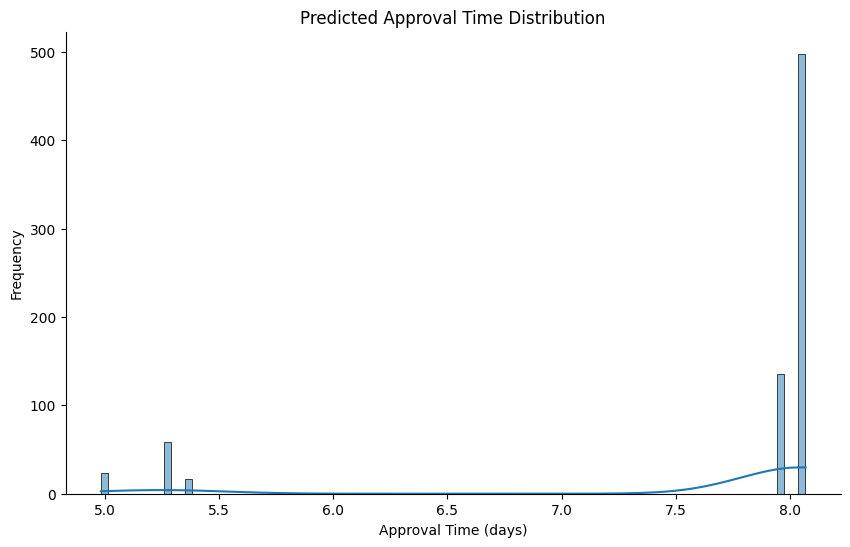

In [34]:
# plot the histogram of the predictions
plt.figure(figsize=(10, 6))
sns.histplot(predictions, bins=100, kde=True)
sns.despine()
plt.xlabel('Approval Time (days)')
plt.ylabel('Frequency')
plt.title('Predicted Approval Time Distribution')
plt.show()

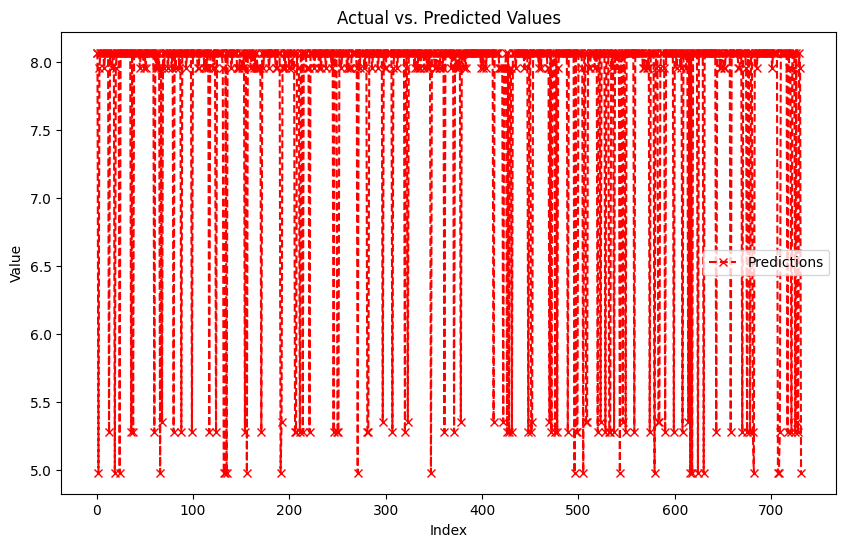

In [28]:
# plot the predictions
# Plotting
plt.figure(figsize=(10, 6))

# Plot actual values
# plt.plot(y, label='Actual', marker='o', color='blue')

# Plot predictions
plt.plot(predictions, label='Predictions', marker='x', linestyle='dashed', color='red')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()

# Show plot
plt.show()

In [26]:
# print the actual and predicted values for the first 10 samples
print(f"Actual: {y[:10].values}")
print(f"Predicted: {predictions[:10]}")


Actual: [  1.   1.  20.  43.  11.   0.   0. 139.  13.   0.]
Predicted: [8.06675576 8.06675576 4.98285263 7.95660721 8.06675576 8.06675576
 8.06675576 8.06675576 7.95660721 8.06675576]


In [ ]:
# distribution of the actual and predicted values
# Plotting
plt.figure(figsize=(10, 6))
plt.hist(y, bins=20, label='Actual', alpha=0.7)
# plt.hist(predictions, bins=20, label='Predicted', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Values')
plt.legend()
plt.show()

In [35]:
# accuracy of the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# calculate the mean squared error
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 15077.58851583839
